# Chapter 3 figures generation

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot helper functions
from ministats import nicebins
from ministats import plot_pdf
from ministats.utils import savefigure

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (5, 1.6)},
)
%config InlineBackend.figure_format = "retina"

# Where to store figures
DESTDIR = "figures/stats/intro_to_NHST"

<Figure size 640x480 with 0 Axes>

In [4]:
def mean(sample):
    return sum(sample) / len(sample)

def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

def std(sample):
    s2 = var(sample)
    return np.sqrt(s2)

def dmeans(xsample, ysample):
    dhat = mean(xsample) - mean(ysample)
    return dhat

## Section 3.4


Saved figure to figures/stats/intro_to_NHST/panel_p-values_theta_left_twotailed_right_tests.pdf
Saved figure to figures/stats/intro_to_NHST/panel_p-values_theta_left_twotailed_right_tests.png


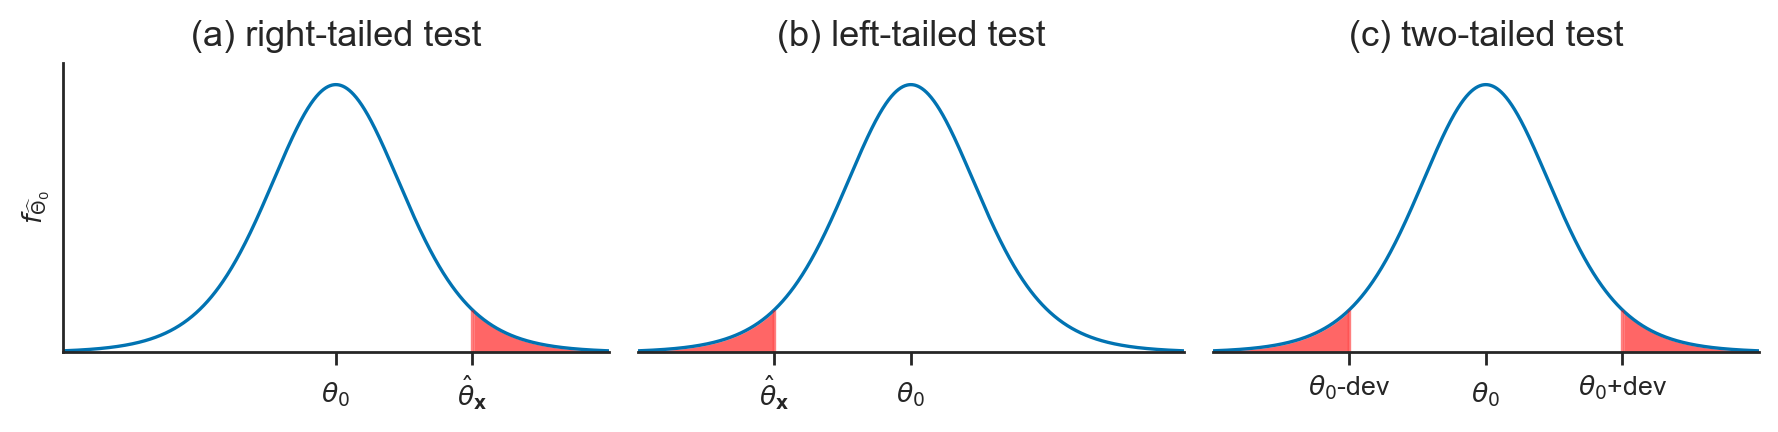

In [5]:
from ministats.book.figures import plot_panel_pvalue_theta0_tails

fig = plot_panel_pvalue_theta0_tails()
filename = os.path.join(DESTDIR, "panel_p-values_theta_left_twotailed_right_tests.pdf")
savefigure(fig, filename)

### Calculating $p$-values for standardized test statistics


Saved figure to figures/stats/intro_to_NHST/panel_p-values_t_left_twotailed_right_tests.pdf
Saved figure to figures/stats/intro_to_NHST/panel_p-values_t_left_twotailed_right_tests.png


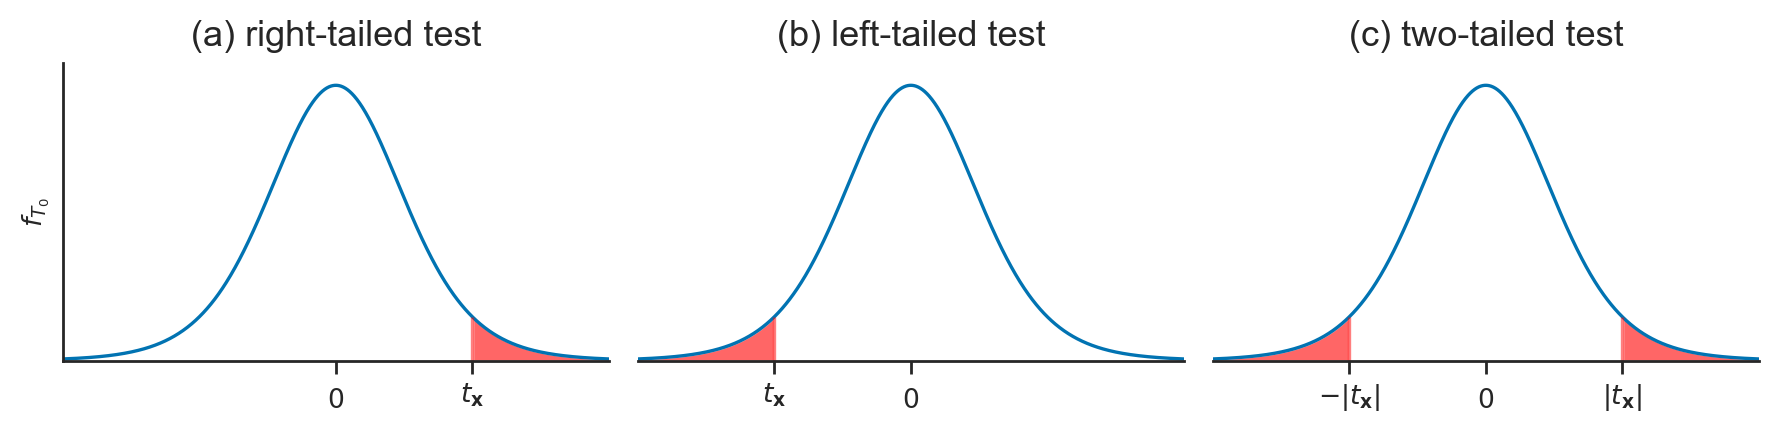

In [6]:
# FIGURES ONLY
from ministats.book.figures import plot_panel_pvalue_t_tails

fig = plot_panel_pvalue_t_tails()
filename = os.path.join(DESTDIR, "panel_p-values_t_left_twotailed_right_tests.pdf")
savefigure(fig, filename)

In [7]:
# parameters of the theoretical model for the kombucha volumes
muK0 = 1000   # population mean (expected kombucha volume)
sigmaK0 = 10  # population standard deviation

### Example 1N: test for the mean of Batch 04

In [8]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch04 = kombucha[kombucha["batch"]==4]
ksample04 = batch04["volume"]
# sample size
n04 = len(ksample04)
n04

40

In [9]:
# observed mean
obsmean04 = mean(ksample04)
obsmean04

1003.8335

In [10]:
# standard error of the mean
se04 = sigmaK0 / np.sqrt(n04)
se04

np.float64(1.5811388300841895)

In [11]:
# compute the z statistic 
obsz04 = (obsmean04 - muK0) / se04
obsz04

np.float64(2.42451828205107)

In [12]:
from scipy.stats import norm
rvZ0 = norm(loc=0, scale=1)

Saved figure to figures/stats/intro_to_NHST/p-value_tails_kombucha_obsz04.pdf
Saved figure to figures/stats/intro_to_NHST/p-value_tails_kombucha_obsz04.png


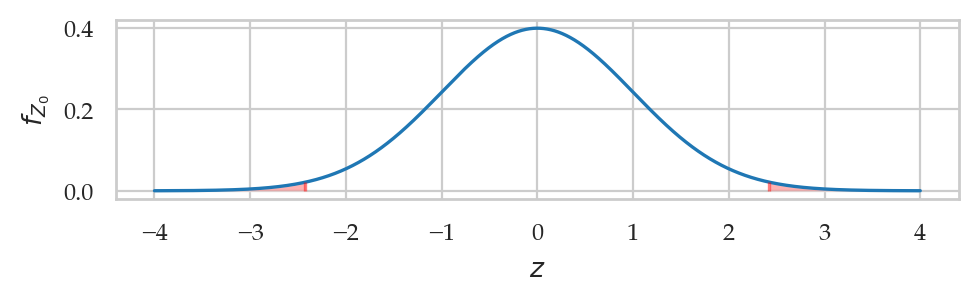

In [13]:
from ministats import calc_prob_and_plot_tails
_, ax = calc_prob_and_plot_tails(rvZ0, -obsz04, obsz04, xlims=[-4,4])
ax.set_title(None)
ax.set_xlabel("$z$")
ax.set_ylabel("$f_{Z_0}$")
filename = os.path.join(DESTDIR, "p-value_tails_kombucha_obsz04.pdf")
savefigure(ax, filename)

#### Alternative calculation without pivotal transformation


Note also the pivotal transformation to the standard $Z$ is not necessary.
We could have obtained the same $p$-value directly from the sampling distribution of the mean,
which is described by a non-standard normal distribution:

$$
  \overline{\mathbf{K}}_0 = \mathcal{N}(\texttt{loc}=\mu_{K_0},\; \texttt{scale}=\stderr{\overline{\mathbf{k}}_{04},0})
$$



In [14]:
from scipy.stats import norm
rvKbar0 = norm(loc=muK0, scale=se04)
#######################################################

In [15]:
dev = abs(obsmean04 - muK0)
dev

3.833499999999958

In [16]:
# left tail            +  right tail 
rvKbar0.cdf(muK0-dev)  +  (1 - rvKbar0.cdf(muK0+dev))

np.float64(0.015328711497996474)

Saved figure to figures/stats/intro_to_NHST/p-value_tails_Example1N_Kbar0.pdf
Saved figure to figures/stats/intro_to_NHST/p-value_tails_Example1N_Kbar0.png


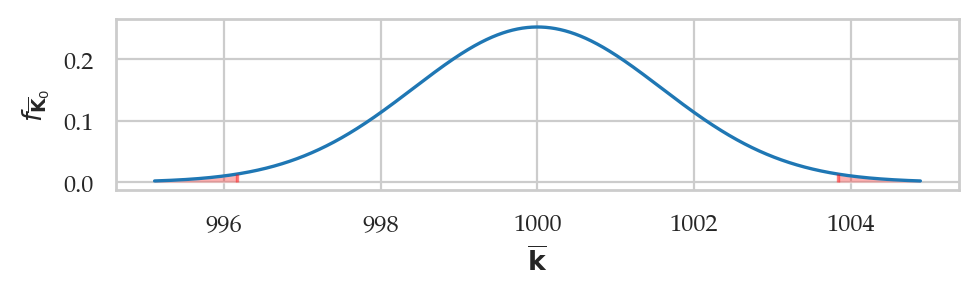

In [17]:
from ministats import calc_prob_and_plot_tails
dev = abs(obsmean04-muK0)
_, ax = calc_prob_and_plot_tails(rvKbar0, muK0-dev, muK0+dev)
ax.set_title(None)
ax.set_xlabel(r"$\overline{\mathbf{k}}$")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}_0}$")

filename = os.path.join(DESTDIR, "p-value_tails_Example1N_Kbar0.pdf")
savefigure(ax, filename)

### Example 2N: test for the mean of Batch 01

In [18]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample01 = kombucha[kombucha["batch"]==1]["volume"]
n01 = len(ksample01)
n01

40

In [19]:
# observed mean
obsmean01 = mean(ksample01)
obsmean01

999.10375

In [20]:
# standard error of the mean
se01 = sigmaK0 / np.sqrt(n01)
se01

np.float64(1.5811388300841895)

In [21]:
# compute the z statistic 
obsz01 = (obsmean01 - muK0) / se01
obsz01

np.float64(-0.5668382705851878)

In [22]:
from scipy.stats import norm

rvZ0 = norm(loc=0, scale=1)

In [23]:
#          left tail               +  right tail 
pvalue01 = rvZ0.cdf(-abs(obsz01))  +  (1 - rvZ0.cdf(abs(obsz01)))
pvalue01

np.float64(0.5708240666473916)

The $p$-value is large,
so there is no reason to reject $H_0$.
We conclude that Batch 01 must be regular.

Saved figure to figures/stats/intro_to_NHST/p-value_tails_kombucha_obsz01.pdf
Saved figure to figures/stats/intro_to_NHST/p-value_tails_kombucha_obsz01.png


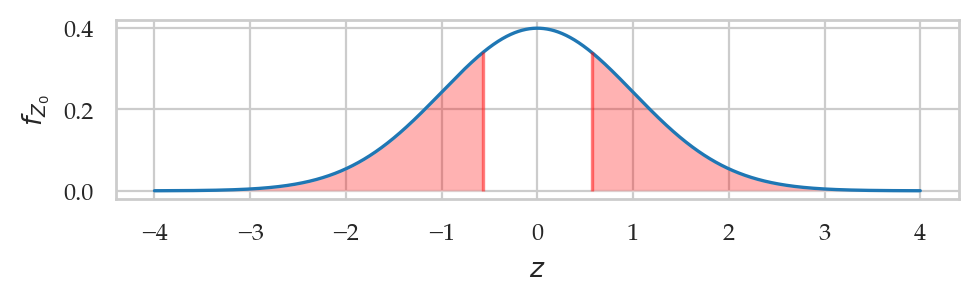

In [24]:
filename = os.path.join(DESTDIR, "p-value_tails_kombucha_obsz01.pdf")
from ministats import calc_prob_and_plot_tails
_, ax= calc_prob_and_plot_tails(rvZ0, obsz01, -obsz01, xlims=[-4,4])
ax.set_title(None)
ax.set_xlabel("$z$")
ax.set_ylabel("$f_{Z_0}$")
savefigure(ax, filename)

### Example 2T: test for the mean of Batch 01

In [25]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample01 = kombucha[kombucha["batch"]==1]["volume"]

In [26]:
# estimated standard error of the mean
s01 = std(ksample01)
n01 = len(ksample01)
sehat01 = s01 / np.sqrt(n01)
sehat01

np.float64(1.5446402654597249)

In [27]:
# observed sample mean
obsmean01 = mean(ksample01)
obsmean01

999.10375

In [28]:
# compute the t statistic 
obst01 = (obsmean01 - muK0) / sehat01
obst01

np.float64(-0.5802321874169595)

In [29]:
from scipy.stats import t as tdist

df01 = n01 - 1  # n-1 degrees of freedom
rvT01 = tdist(df=df01)

In [30]:
#######################################################
#           left tail          +  right tail 
pvalue01t = rvT01.cdf(-abs(obst01)) + 1-rvT01.cdf(abs(obst01))
pvalue01t

np.float64(0.5650956637295477)

In [31]:
# # ALT. compute right tail and double the value
# p_right = 1 - rvT01.cdf(abs(obst01))
# pvalue01t = 2 * p_right 
# pvalue01t

Saved figure to figures/stats/intro_to_NHST/p-value_tails_kombucha_obst01.pdf
Saved figure to figures/stats/intro_to_NHST/p-value_tails_kombucha_obst01.png


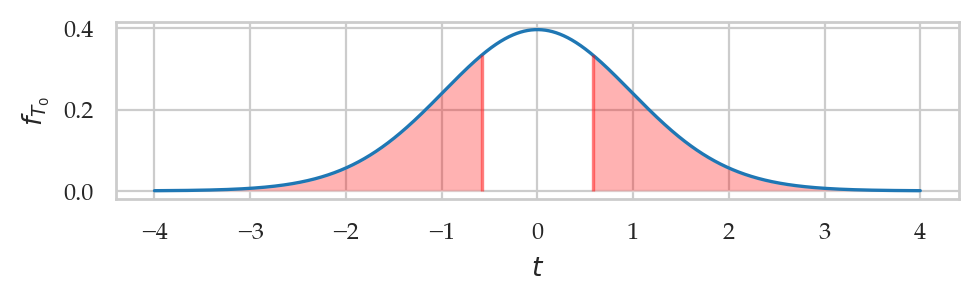

In [32]:
filename = os.path.join(DESTDIR, "p-value_tails_kombucha_obst01.pdf")
from ministats import calc_prob_and_plot_tails
_, ax = calc_prob_and_plot_tails(rvT01, obst01, -obst01, xlims=[-4,4])
ax.set_title(None)
ax.set_xlabel("$t$")
ax.set_ylabel("$f_{T_0}$")
savefigure(ax, filename)

### Example 3X: test for the variance of Batch 02

In [33]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample02 = kombucha[kombucha["batch"]==2]["volume"]
n02 = len(ksample02)
n02

20

In [34]:
obsvar02 = var(ksample02)
obsvar02

124.31760105263139

We can now compute the $q$-statistic,
which is the observed sample variance estimate $s_{\mathbf{k}_{02}}^2 = 124.32$
divided by the scale factor $\tfrac{ \sigma_{K_0}^2 }{ n-1 }$.

In [35]:
obsq02 = (n02-1) * obsvar02 / sigmaK0**2
obsq02

23.620344199999963

In [36]:
from scipy.stats import chi2

rvX2 = chi2(df=n02-1)
pvalue02 = 1 - rvX2.cdf(obsq02)
pvalue02

np.float64(0.21112073283603838)

The $p$-value is large,
so there is no reason to reject $H_0$.

Saved figure to figures/stats/intro_to_NHST/p-value_right_tail_kombucha_obsq02.pdf
Saved figure to figures/stats/intro_to_NHST/p-value_right_tail_kombucha_obsq02.png


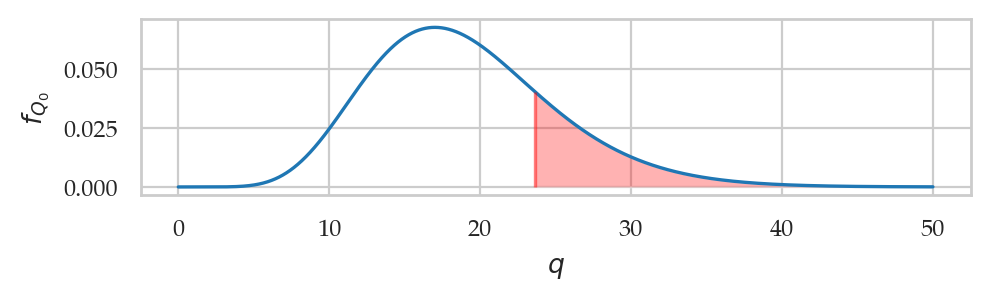

In [37]:
filename = os.path.join(DESTDIR, "p-value_right_tail_kombucha_obsq02.pdf")
_, ax = calc_prob_and_plot_tails(rvX2, 0, obsq02, xlims=[0,50])
ax.set_title(None)
ax.set_xlabel("$q$")
ax.set_ylabel("$f_{Q_0}$")
savefigure(ax, filename)

## Section 3.5

In [38]:
# Where to store figures
DESTDIR = "figures/stats/two_sample_tests"

Saved figure to figures/stats/inventory/panel_D0_hist_and_dist_twosided_pvalues.pdf
Saved figure to figures/stats/inventory/panel_D0_hist_and_dist_twosided_pvalues.png


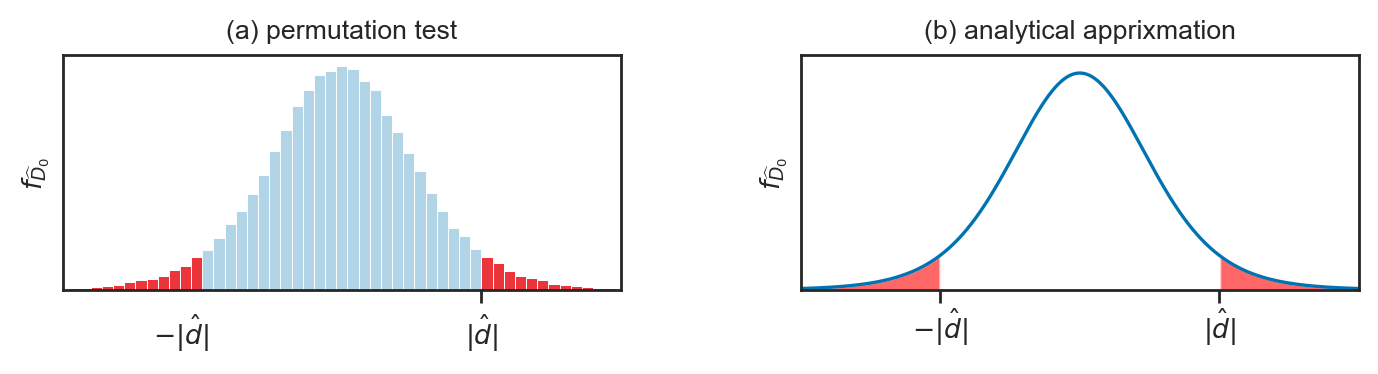

In [81]:
# FIGURES ONLY
from ministats.book.figures import plot_panel_pvalue_D0_hist_and_dist

filename = os.path.join(DESTDIR, "panel_D0_hist_and_dist_twosided_pvalues.pdf")
fig = plot_panel_pvalue_D0_hist_and_dist()
savefigure(fig, filename, tight_layout_kwargs={"w_pad":5})

### Example 5P: electricity prices

The probability model under the alternative hypothesis
describes two populations with different parameters:

$$
   H_A: \qquad X_W = \mathcal{N}({\color{blue}{\mu_W}, \sigma_W})
   \quad \textrm{and} \quad
   X_{E} = \mathcal{N}({\color{orange}{\mu_{E}}, \sigma_{E}})
$$

Under the null hypothesis the populations have the same mean:

$$ 
   H_0: \qquad X_W = \mathcal{N}({\color{red}{\mu_0}, \sigma_W})
   \quad \textrm{and} \quad
   X_{E} = \mathcal{N}({\color{red}{\mu_0}, \sigma_{E}})
$$









In [40]:
eprices = pd.read_csv("../datasets/eprices.csv")
# eprices

In [41]:
pricesW = eprices[eprices["loc"]=="West"]["price"]
pricesE = eprices[eprices["loc"]=="East"]["price"]

# 1. Calculate the observed difference between means
dprice = dmeans(pricesW, pricesE)
dprice

3.0000000000000018

In [42]:
def resample_under_H0(xsample, ysample):
    """
    Generate new samples from a random permutation of
    the values in the samples `xsample` and `xsample`.
    """
    values = np.concatenate((xsample, ysample))
    pvalues = np.random.permutation(values)
    pxsample = pvalues[0:len(xsample)]
    pysample = pvalues[len(xsample):]
    return pxsample, pysample

In [43]:
np.random.seed(31)
# generate new samples by shuffling the labels
ppricesW, ppricesE = resample_under_H0(pricesW, pricesE)

# Compute the difference in means for the bootstrap samples
pdhat0 = dmeans(ppricesW, ppricesE)
# pdhat0

#### Running a permutation test

We can repeat the resampling procedure `10000` times to get the sampling distribution of $\widehat{D}_0$ under $H_0$,
as illustrated in the code procedure below.

In [44]:
np.random.seed(42)

# 2. Obtain the sampling distribution under H0
P = 10000
pdhats0 = []
for i in range(0, P):
    ps1, ps2 = resample_under_H0(pricesW, pricesE)
    pdhat0 = dmeans(ps1, ps2)
    pdhats0.append(pdhat0)

In [45]:
# Stats helper functions
from ministats import tailvalues
from ministats import tailprobs

In [46]:
# 3. Compute the p-value 
tails = tailvalues(pdhats0, dprice)
pvalue = len(tails) / len(pdhats0)
pvalue

0.0002

Saved figure to figures/stats/two_sample_tests/hist_p-value_dmeans_eprices.pdf
Saved figure to figures/stats/two_sample_tests/hist_p-value_dmeans_eprices.png


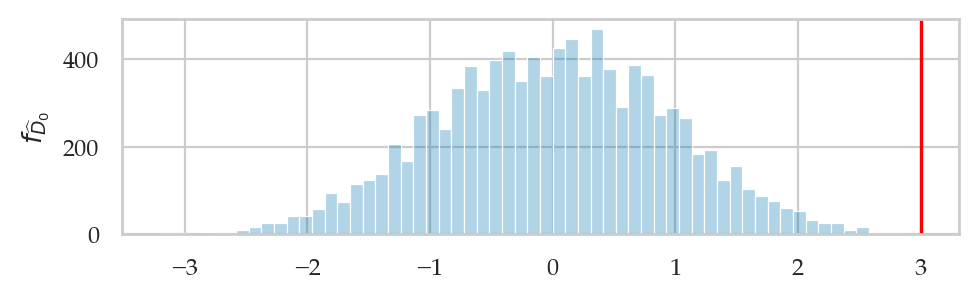

In [47]:
filename = os.path.join(DESTDIR, "hist_p-value_dmeans_eprices.pdf")

# plot the sampling distribution in blue
bins = nicebins(pdhats0, dprice)
ax = sns.histplot(pdhats0, bins=bins, alpha=0.3)

# plot red line for the observed statistic
plt.axvline(dprice, color="red")

# plot the values that are equal or more extreme in red
sns.histplot(tails, ax=ax, bins=bins, color="red")
ax.set_ylabel(r"$f_{\widehat{D}_0}$")

savefigure(ax, filename)

### Example 6P: lecture and debate curriculums

In [48]:
students = pd.read_csv("../datasets/students.csv")

In [49]:
studentsD = students[students["curriculum"]=="debate"]
studentsL = students[students["curriculum"]=="lecture"]
scoresD = studentsD["score"]
scoresL = studentsL["score"]

# observed difference between score means
dscore = dmeans(scoresD, scoresL)
dscore

8.319642857142867

In [50]:
def permutation_test_dmeans(xsample, ysample, P=10000):
    # 1. Compute the observed difference between means
    obsdhat = dmeans(xsample, ysample)

    # 2. Get sampling dist. of `dmeans` under H0
    pdhats0 = []
    for i in range(0, P):
        psx, psy = resample_under_H0(xsample, ysample)
        pdhat0 = dmeans(psx, psy)
        pdhats0.append(pdhat0)

    # 3. Compute the p-value
    tails = tailvalues(pdhats0, obsdhat, alt="two-sided")
    pvalue = len(tails) / len(pdhats0)
    return pvalue

In [51]:
np.random.seed(43)
pvalue = permutation_test_dmeans(scoresD, scoresL)
pvalue

0.1115

Saved figure to figures/stats/two_sample_tests/hist_p-value_dmeans_students.pdf
Saved figure to figures/stats/two_sample_tests/hist_p-value_dmeans_students.png


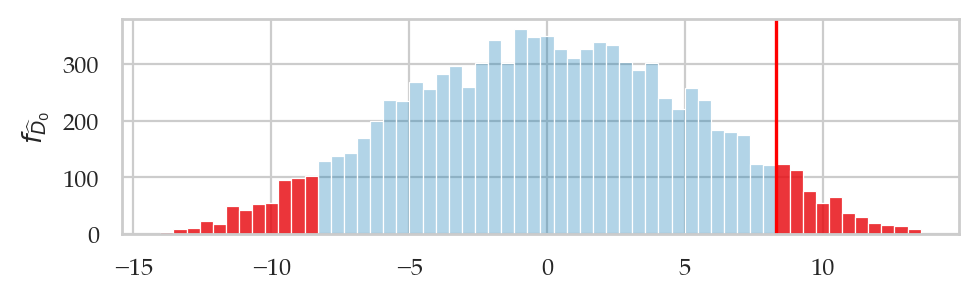

In [52]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "hist_p-value_dmeans_students.pdf")

# generate sampling distribution under H0
np.random.seed(43)
pdhats = []
P = 10000
for i in range(0, P):
    rs1, rs2 = resample_under_H0(scoresD, scoresL)
    pdhat = dmeans(rs1, rs2)
    pdhats.append(pdhat)
    
# plot the sampling distribution in blue
bins = nicebins(pdhats, dscore)
ax = sns.histplot(pdhats, bins=bins, alpha=0.3)

# plot red line for the observed statistic
plt.axvline(dscore, color="red")

# plot the values that are equal or more extreme in red
tails = tailvalues(pdhats, dscore)
# print( len(tails) / len(pdhats) )
sns.histplot(tails, bins=bins, ax=ax, color="red")
ax.set_ylabel(r"$f_{\widehat{D}_0}$")

savefigure(ax, filename)

## Analytical approximation methods

Saved figure to figures/stats/two_sample_tests/panel_D0_and_T0_twosided_pvalues.pdf
Saved figure to figures/stats/two_sample_tests/panel_D0_and_T0_twosided_pvalues.png


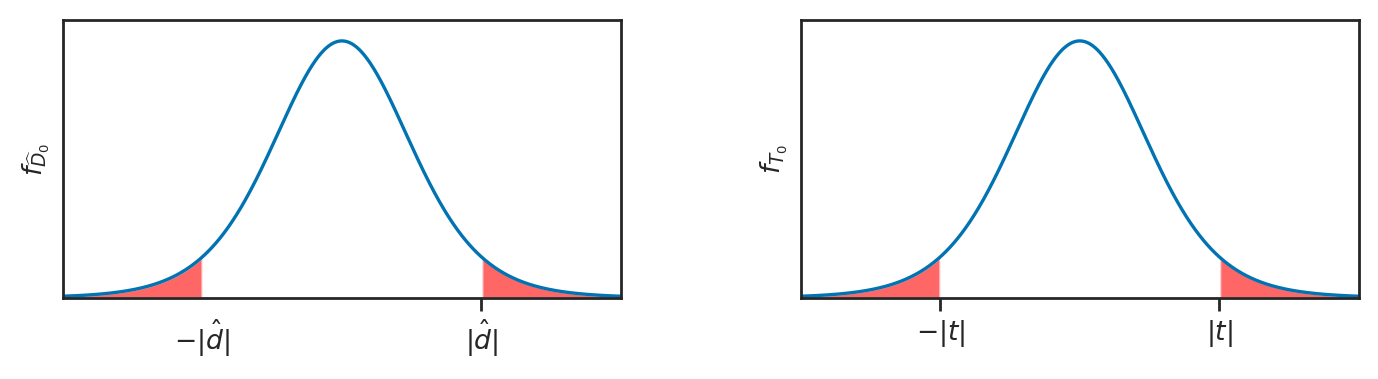

In [53]:
from ministats.book.figures import plot_panel_pvalue_D0_and_T0

filename = os.path.join(DESTDIR, "panel_D0_and_T0_twosided_pvalues.pdf")
fig = plot_panel_pvalue_D0_and_T0()
savefigure(fig, filename, tight_layout_kwargs={"w_pad":5})

### Example 6T: comparing rural and urban sleep scores

In [54]:
students = pd.read_csv("../datasets/students.csv")
scoresD = students[students["curriculum"]=="debate"]["score"]
scoresL = students[students["curriculum"]=="lecture"]["score"]

# observed difference between score means
dscores = dmeans(scoresD, scoresL)
dscores

8.319642857142867

In [55]:
from ministats import calcdf

def ttest_dmeans(xsample, ysample):
    # Calculate the observed difference between means
    obsdhat = mean(xsample) - mean(ysample)

    # Calculate the sample sizes and the stds
    n, m = len(xsample), len(ysample)
    sx, sy = std(xsample), std(ysample)

    # Calculate the standard error, the degrees of
    # freedom, the null model, and the t-statistic
    seD = np.sqrt(sx**2/n + sy**2/m)
    dfD = calcdf(sx, n, sy, m)
    obst = (obsdhat - 0) / seD

    # Calculate the p-value from the t-distribution
    rvT0 = tdist(df=dfD)
    pvalue = tailprobs(rvT0, obst, alt="two-sided")
    return pvalue


In [56]:
ttest_dmeans(scoresD, scoresL)

np.float64(0.10307495448387402)

0.10307495448387402
Saved figure to figures/stats/two_sample_tests/rvT0_p-value_dmeans_student_scores.pdf
Saved figure to figures/stats/two_sample_tests/rvT0_p-value_dmeans_student_scores.png


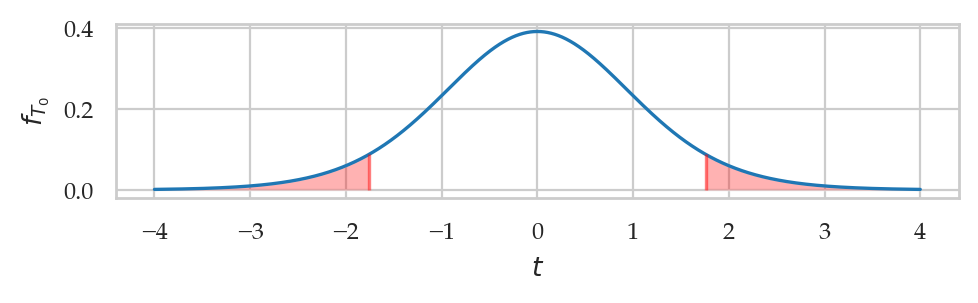

In [57]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "rvT0_p-value_dmeans_student_scores.pdf")

# T-TEST ANALYSIS
nD, nL = len(scoresD), len(scoresL)
stdD, stdL = std(scoresD), std(scoresL)
seDDL = np.sqrt(stdD**2/nD + stdL**2/nL)

obstDL = (dscores - 0) / seDDL

from ministats import calcdf
dfDL = calcdf(stdD, nD, stdL, nL)
rvT0DL = tdist(df=dfDL)
pvalueDL = tailprobs(rvT0DL, obstDL, alt="two-sided")
print(pvalueDL)

from ministats import calc_prob_and_plot_tails
_, ax = calc_prob_and_plot_tails(rvT0DL, -obstDL, obstDL, xlims=[-4,4])
ax.set_title(None)
ax.set_xlabel("$t$")
ax.set_ylabel("$f_{T_0}$")

savefigure(ax, filename)

## Section 3.6

In [58]:
# Where to store figures
DESTDIR = "figures/stats/design"

Design params: n = 9 , alpha = 0.05 , beta = 0.9106637458903489 , Delta = 0.2 , d = 0.1 , CV = 1.0965690846343146
Saved figure to figures/stats/design/H0_rejection_region.pdf
Saved figure to figures/stats/design/H0_rejection_region.png


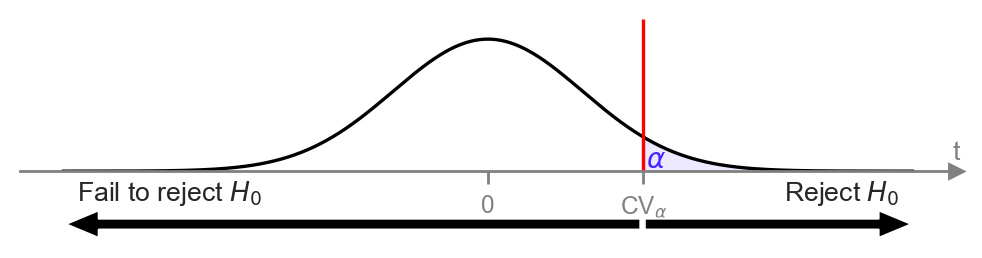

In [59]:
# FIGURES ONLY
from ministats import plot_alpha_beta_errors
with sns.axes_style("ticks"), plt.rc_context({"figure.figsize":(5,1.5)}):
    ax = plot_alpha_beta_errors(cohend=0.1, ax=None, xlims=[-3,3], n=9,
                                show_alt=False, show_concl=True,
                                alpha_offset=(0,0.014),
                                fontsize=10)
filename = os.path.join(DESTDIR, "H0_rejection_region.pdf")
savefigure(ax, filename)

Design params: n = 9 , alpha = 0.05 , beta = 0.22508058066585585 , Delta = 1.6 , d = 0.8 , CV = 1.0965690846343146
Saved figure to figures/stats/design/H0_HA_distributions_cvalue.pdf
Saved figure to figures/stats/design/H0_HA_distributions_cvalue.png


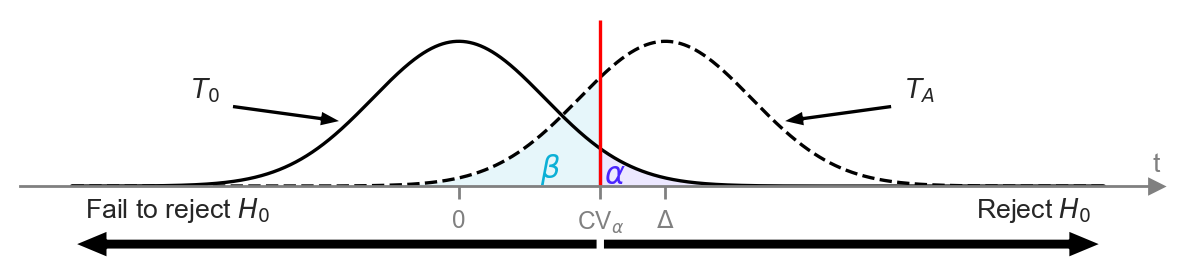

In [60]:
# FIGURES ONLY
from ministats import plot_alpha_beta_errors

with sns.axes_style("ticks"), plt.rc_context({"figure.figsize":(6,1.6)}):
    ax = plot_alpha_beta_errors(cohend=0.8, show_dist_labels=True, show_concl=True,
                                fontsize=11,
                                alpha_offset=(0,0.013),
                                beta_offset=(-0.06,0.02))

filename = os.path.join(DESTDIR, "H0_HA_distributions_cvalue.pdf")
savefigure(ax, filename)

## Statistical design

Design params: n = 15 , alpha = 0.05 , beta = 0.8079200023112518 , Delta = 0.4 , d = 0.2 , CV = 0.8493987605509223
Design params: n = 15 , alpha = 0.05 , beta = 0.2868036281956132 , Delta = 1.14 , d = 0.57 , CV = 0.8493987605509223
Design params: n = 15 , alpha = 0.05 , beta = 0.07303790512845218 , Delta = 1.6 , d = 0.8 , CV = 0.8493987605509223
Design params: n = 15 , alpha = 0.05 , beta = 0.0003494316033385531 , Delta = 2.6 , d = 1.3 , CV = 0.8493987605509223
Saved figure to figures/stats/design/panel_beta_for_different_effect_sizes.pdf
Saved figure to figures/stats/design/panel_beta_for_different_effect_sizes.png


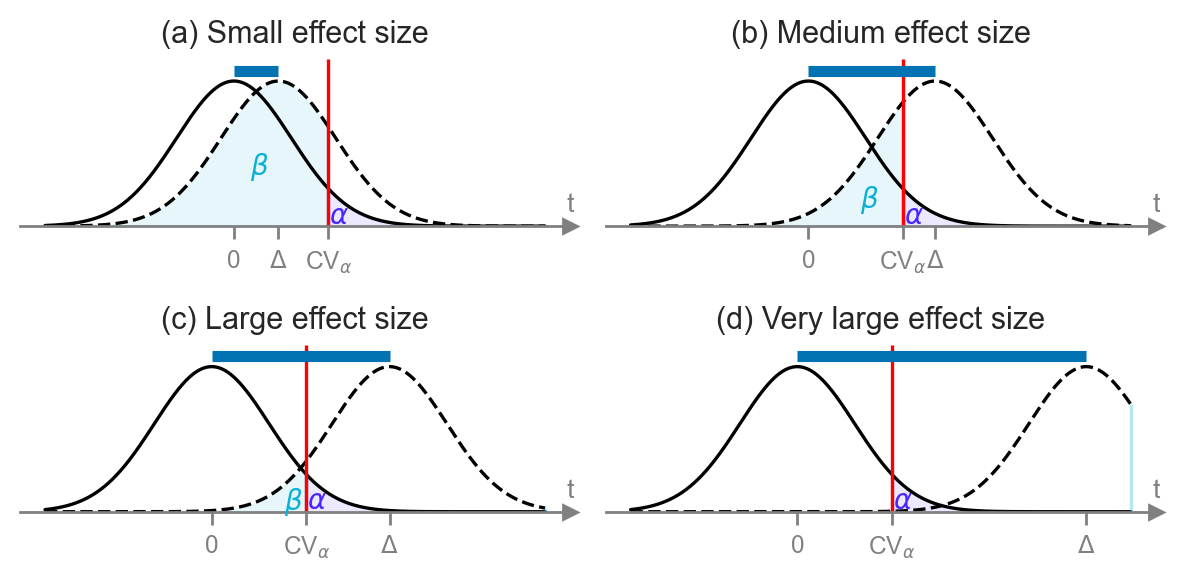

In [61]:
# FIGURES ONLY
d_small = 0.20
d_medium = 0.57 # chosen to avoid overlap between CV and Delta
d_large = 0.80
d_vlarge = 1.3

with sns.axes_style("ticks"):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(6,3))
    
    plot_alpha_beta_errors(cohend=d_small,  xlims=[-1.7,2.8], n=15, ax=ax1, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(0.1,0.2))
    ax1.set_title("(a) Small effect size", fontsize=11)
    
    plot_alpha_beta_errors(cohend=d_medium, xlims=[-1.6,2.9], n=15, ax=ax2, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(0.05,0.08))
    ax2.set_title("(b) Medium effect size", fontsize=11)
    
    plot_alpha_beta_errors(cohend=d_large,  xlims=[-1.5,3], n=15, ax=ax3, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(0,0.02))
    ax3.set_title("(c) Large effect size", fontsize=11)
    
    plot_alpha_beta_errors(cohend=d_vlarge,  xlims=[-1.5,3], n=15, ax=ax4, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(-0.06,0.02))
    ax4.set_title("(d) Very large effect size", fontsize=11)

    filename = os.path.join(DESTDIR, "panel_beta_for_different_effect_sizes.pdf")
    savefigure(fig, filename)

Design params: n = 15 , alpha = 0.05 , beta = 0.2485890864965961 , Delta = 1.2 , d = 0.6 , CV = 0.8493987605509223
Design params: n = 30 , alpha = 0.05 , beta = 0.05034872950555784 , Delta = 1.2 , d = 0.6 , CV = 0.6006156235170057
Saved figure to figures/stats/design/panel_beta_for_different_sample_sizes.pdf
Saved figure to figures/stats/design/panel_beta_for_different_sample_sizes.png


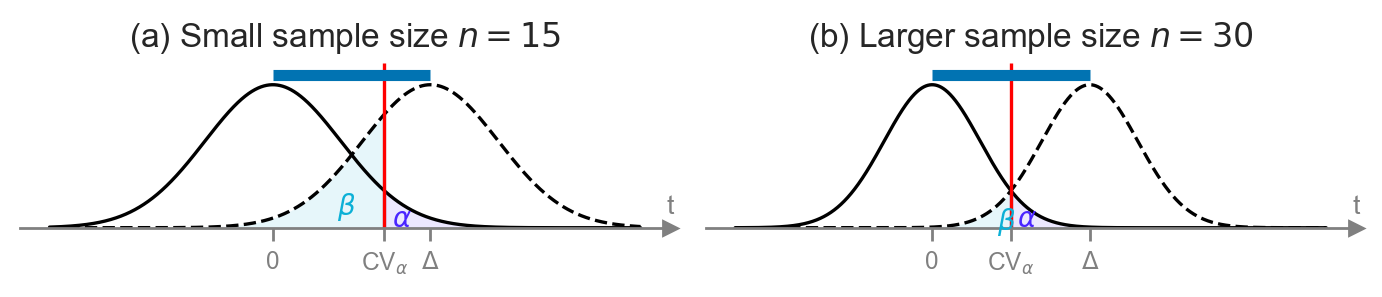

In [62]:
# FIGURES ONLY
Delta = 0.6

# TODO: check this figure --> results for n=15 seem to be too good to be true...
with sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,1.6))
    
    n1 = 15
    plot_alpha_beta_errors(cohend=Delta,  xlims=[-1.7,2.8], n=n1, ax=ax1, fontsize=10, show_es=True,
                           alpha_offset=(0.03,0.005), beta_offset=(0,0.05))
    ax1.set_title(f"(a) Small sample size $n={n1}$", fontsize=12)
    
    n2 = 30
    plot_alpha_beta_errors(cohend=Delta,  xlims=[-1.5,3], n=n2, ax=ax2, fontsize=10, show_es=True,
                           alpha_offset=(0.005,0), beta_offset=(0.04,0.01))
    ax2.set_title(f"(b) Larger sample size $n={n2}$", fontsize=12)

    filename = os.path.join(DESTDIR, "panel_beta_for_different_sample_sizes.pdf")
    savefigure(fig, filename)

Design params: n = 15 , alpha = 0.05 , beta = 0.2485890864965961 , Delta = 1.2 , d = 0.6 , CV = 0.8493987605509223
Design params: n = 15 , alpha = 0.1 , beta = 0.14865057213685162 , Delta = 1.2 , d = 0.6 , CV = 0.6617903827547039
Saved figure to figures/stats/design/panel_beta_for_different_alphas.pdf
Saved figure to figures/stats/design/panel_beta_for_different_alphas.png


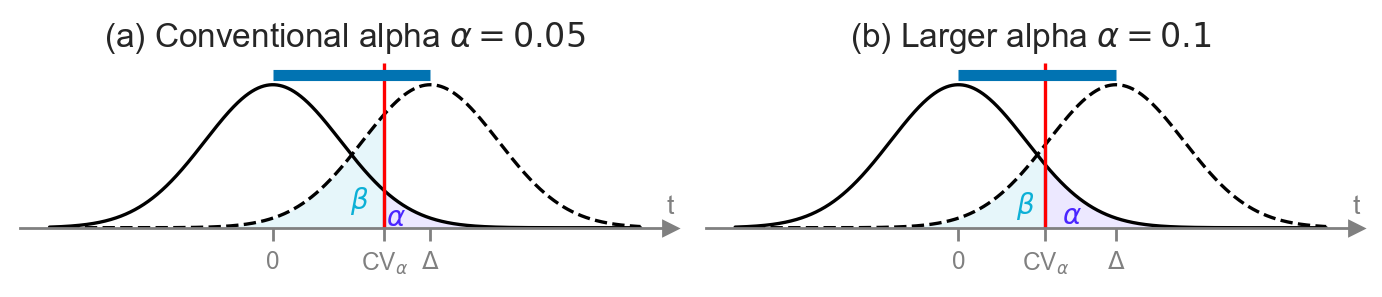

In [63]:
# FIGURES ONLY
Delta = 0.6

with sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,1.6))
    
    n1 = 15
    alpha1 = 0.05
    plot_alpha_beta_errors(alpha=alpha1, cohend=Delta, xlims=[-1.7,2.8], n=15, ax=ax1, fontsize=10, show_es=True,
                           alpha_offset=(-0.02,0.005), beta_offset=(0.1,0.1))
    ax1.set_title(r"(a) Conventional alpha $\alpha=0.05$", fontsize=12)

    alpha2 = 0.1
    plot_alpha_beta_errors(alpha=alpha2, cohend=Delta, xlims=[-1.7,2.8], n=15, ax=ax2, fontsize=10, show_es=True,
                           alpha_offset=(0,0.005), beta_offset=(0.05,0.05))
    ax2.set_title(r"(b) Larger alpha $\alpha=0.1$", fontsize=12)

    filename = os.path.join(DESTDIR, "panel_beta_for_different_alphas.pdf")
    savefigure(fig, filename)

## Example 1: detect kombuncha volume deviation from theory

Design Type A: choose $\alpha=0.05$, $\beta=0.2$, $\Delta_{\textrm{min}} = 4\;\text{ml}$ then calculate required sample size $n$.
We'll assume $\sigma=10$.

In [64]:
alpha = 0.05
beta = 0.2
Delta_min = 4

# assumption
sigma = 10

In [65]:
from scipy.stats import norm
rvZ = norm(loc=0, scale=1)

z_u = rvZ.ppf(1-alpha)
z_l = rvZ.ppf(beta)

n_approx = (z_u - z_l)**2 * sigma**2 / Delta_min**2
n_approx

np.float64(38.64098270012354)

### Using `statsmodels`

To use the `statsmodels` sample size estimation function,
we'll need to express the effect size $\Delta=4$ in terms of Cohen's $d$.

In [66]:
d = Delta_min / sigma
d

0.4

In [67]:
from statsmodels.stats.power import TTestPower
ttp = TTestPower()
n = ttp.solve_power(effect_size=d, alpha=0.05, power=0.8,
                    alternative="larger")
n

40.02907613995643

In [68]:
from scipy.stats import t as tdist

rvT0 = tdist(df=n-1)
CV_alpha = rvT0.ppf(0.95)
CV_alpha

np.float64(1.6848445860460983)

Saved figure to figures/stats/design/plot_one_sample_t_power_vs_sample_size.pdf
Saved figure to figures/stats/design/plot_one_sample_t_power_vs_sample_size.png


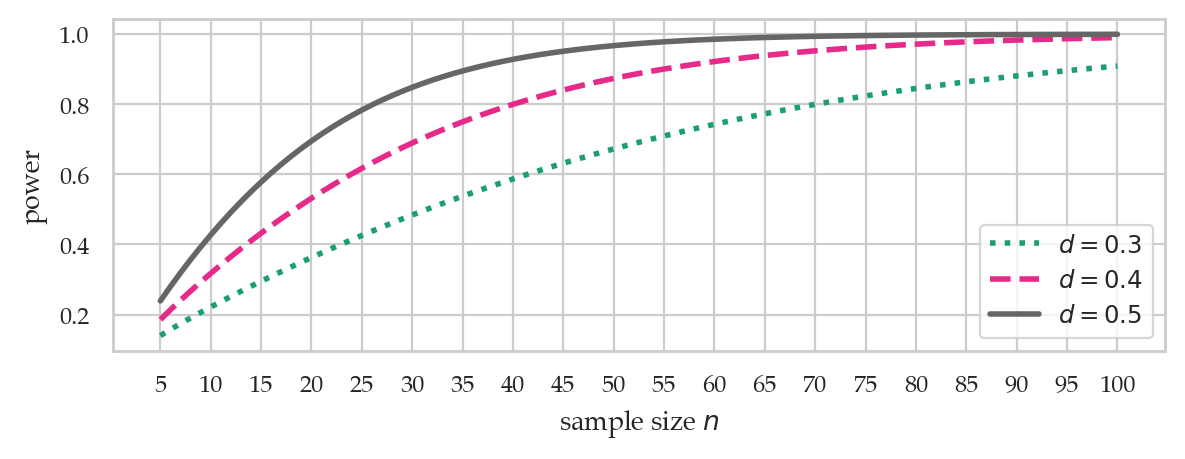

In [69]:
ds = np.array([0.3, 0.4, 0.5])
ns = np.arange(5, 101)
fig, ax = plt.subplots(figsize=(6,2.4))
ttp.plot_power(dep_var="nobs", ax=ax,
               effect_size=ds, nobs=ns, alpha=0.05,
               alternative="larger")
ax.set_xticks( np.arange(5,105,5) )
# ax.set_title("Power of t-test vs. sample size for different effect sizes")
ax.set_title(None)
ax.set_xlabel("sample size $n$")
ax.set_ylabel("power")
# set custom line styles
linestyles = ["dotted", "dashed", "solid"]
for line, ls in zip(ax.get_lines(), linestyles):
    line.set_linestyle(ls)
# set custom legend
labels = [f"$d={d}$" for d in ds]
ax.legend(ax.get_lines(), labels, loc="lower right")

# FIGURES ONLY
filename = os.path.join(DESTDIR, "plot_one_sample_t_power_vs_sample_size.pdf")
savefigure(fig, filename)

Saved figure to figures/stats/design/plot_one_sample_t_power_vs_effect_size.pdf
Saved figure to figures/stats/design/plot_one_sample_t_power_vs_effect_size.png


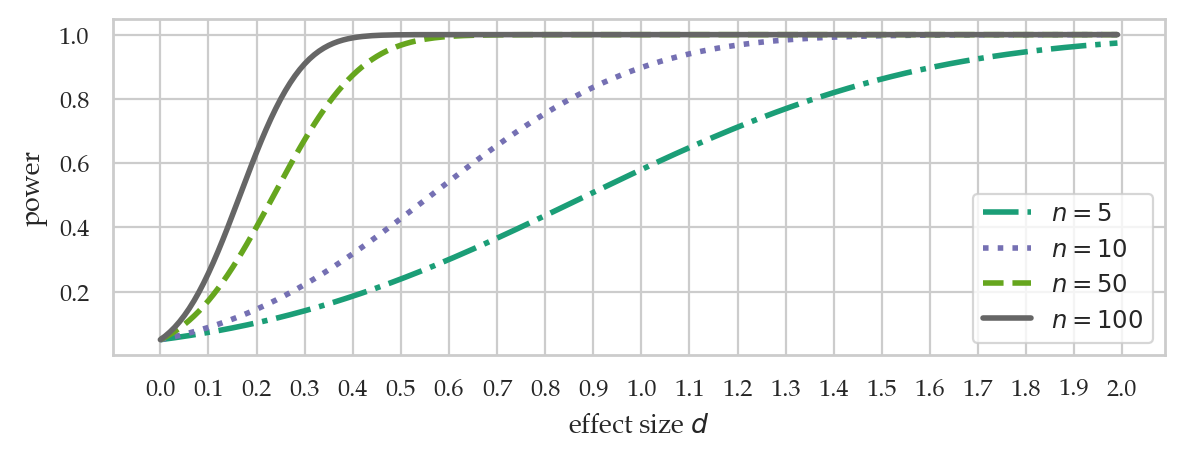

In [70]:
ds = np.arange(0, 2, 0.01)
ns = np.array([5, 10, 50, 100])
fig, ax = plt.subplots(figsize=(6,2.4))
ttp.plot_power(dep_var="effect size", ax=ax,
               effect_size=ds, nobs=ns, alpha=0.05,
               alternative="larger")
ax.set_xticks( np.arange(0, 2+0.1, 0.1) )
# ax.set_title("Power of t-test vs. effect size for different sample sizes")
ax.set_title(None)
ax.set_xlabel("effect size $d$")
ax.set_ylabel("power")

# set custom line styles
linestyles = ["dashdot", "dotted", "dashed", "solid"]
for line, ls in zip(ax.get_lines(), linestyles):
    line.set_linestyle(ls)
# set custom legend
labels = [f"$n={n}$" for n in ns]
ax.legend(ax.get_lines(), labels)

# FIGURES ONLY
filename = os.path.join(DESTDIR, "plot_one_sample_t_power_vs_effect_size.pdf")
savefigure(fig, filename)

## Example 2: comparison of East vs. West electricity prices 

In [71]:
eprices = pd.read_csv("../datasets/eprices.csv")
eprices.groupby("loc").describe()

price                                               
     count      mean       std  min  25%  50%   75%   max
loc                                                      
East   9.0  6.155556  0.877655  4.8  5.5  6.3   6.5   7.7
West   9.0  9.155556  1.562139  6.8  8.3  8.6  10.0  11.8

Need a guess the effect size,
which we'll express in terms of Cohen's $d$.
We choose $d=1$,
which corresponds to a difference of one cent $\Delta_{\text{min}} = 1$,
assuming the standard deviation of the prices is around $\sigma=1$.

In [72]:
cohend2_min = 1

#### Solving for a desired power

The function `solve_power` takes as argument the chosen level of `power`,
and two of the three other design parameters `alpha`, `nobs1`, and `effect_size`,
and calculates the value of the third parameter required to achieve the chosen level of `power` $=(1-\beta)$.

In [73]:
from statsmodels.stats.power import TTestIndPower
ttindp = TTestIndPower()

# power of two-sample t-test assuming cohend2_min and n=m=9 
ttindp.power(effect_size=cohend2_min, nobs1=9, 
             alpha=0.05, alternative="two-sided")

np.float64(0.5133625331068463)

The Type II error rate $\beta$ of this test is 

In [74]:
1 - 0.5133625331068463

0.4866374668931537

Saved figure to figures/stats/design/plot_two_sample_t_power_vs_sample_size.pdf
Saved figure to figures/stats/design/plot_two_sample_t_power_vs_sample_size.png


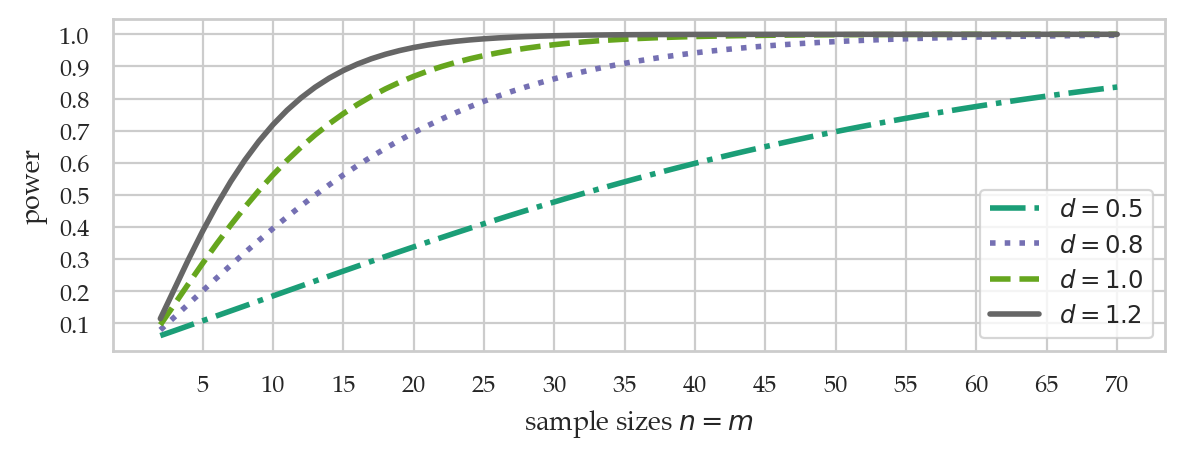

In [75]:
ds = np.array([0.5, 0.8, 1.0, 1.2])
ns = np.arange(2, 71)
fig, ax = plt.subplots(figsize=(6,2.4))
ttindp.plot_power(dep_var="nobs", ax=ax,
                  effect_size=ds, nobs=ns, alpha=0.05,
                  alternative="two-sided")
ax.set_xticks( np.arange(5,75,5) )
# ax.set_title("Power of two-sample t-test vs. sample size $n=m$ for different effect sizes")
ax.set_title(None)
ax.set_xlabel("sample sizes $n=m$")
ax.set_yticks([0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_ylabel("power")

# set custom line styles
linestyles = ["dashdot", "dotted", "dashed", "solid"]
for line, ls in zip(ax.get_lines(), linestyles):
    line.set_linestyle(ls)
# set custom legend
labels = [f"$d={d}$" for d in ds]
ax.legend(ax.get_lines(), labels)

filename = os.path.join(DESTDIR, "plot_two_sample_t_power_vs_sample_size.pdf")
savefigure(fig, filename)

### One-sided and two-sided rejection regions

In [76]:
from scipy.stats import t as tdist
rvT0 = tdist(df=9)

alpha = 0.05

# right-tailed rejection region
rvT0.ppf(alpha)

np.float64(-1.8331129326536337)

In [77]:
# left-tailed rejection region
rvT0.ppf(1-alpha)

np.float64(1.8331129326536333)

In [78]:
# two-sided rejection region
rvT0.ppf(alpha/2), rvT0.ppf(1 - alpha/2)

(np.float64(-2.2621571628540997), np.float64(2.262157162854099))

Saved figure to figures/stats/design/panel_rejection_regions_left_twotailed_right.pdf
Saved figure to figures/stats/design/panel_rejection_regions_left_twotailed_right.png


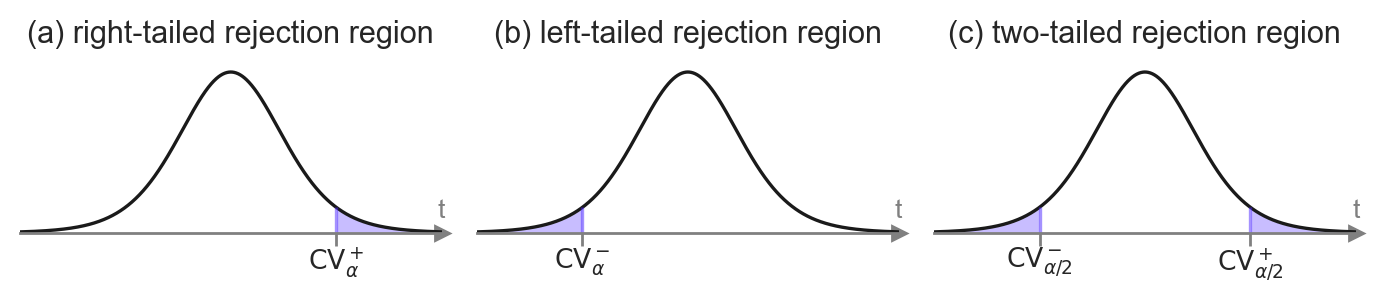

In [79]:
from ministats.book.figures import plot_panel_rejection_regions

fig = plot_panel_rejection_regions()
filename = os.path.join(DESTDIR, "panel_rejection_regions_left_twotailed_right.pdf")
savefigure(fig, filename)

## Section 3.7 — Inventory of statistical tests


In [80]:
# Where to store figures
DESTDIR = "figures/stats/inventory"